In [142]:
import pandas as pd

In [172]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [331]:
#df=pd.read_csv('DATA_GAIA_InGit/XMatch/TGAS_d125_Wright2003_2Mass.csv', sep=',')
df=pd.read_csv('DATA_GAIA_InGit/XMatch/TGAS_d125_Wright2003_2Mass.csv', sep=',')
list(df)

['angDist',
 '2MASS',
 'RAJ2000',
 'DEJ2000',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'Jmag',
 'Hmag',
 'Kmag',
 'e_Jmag',
 'e_Hmag',
 'e_Kmag',
 'Qfl',
 'Rfl',
 'X',
 'MeasureJD',
 'd_arcsec',
 '_RAJ2000',
 '_DEJ2000',
 'HIP',
 'TYC2',
 'Source',
 'RA_ICRS',
 'e_RA_ICRS',
 'DE_ICRS',
 'e_DE_ICRS',
 'Plx',
 'e_Plx',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'Dup',
 '__FG_',
 'e__FG_',
 '__Gmag_',
 'Var',
 '---',
 'TYC1',
 'TYC2.1',
 'TYC3',
 'RAdeg',
 'DEdeg',
 'VTmag',
 'BTmag',
 'r_SpType',
 'Name',
 'Dist',
 'Mag',
 'f_Mag',
 'TClass',
 'SClass',
 'LClass',
 'Teff',
 'SpType']

In [314]:
#print(df)
print(df.Jmag[100:101])
print(df[0:10])
#isinstance(df.Qfl,float)
#print(df.iloc[0])
#print(df.loc[0])
print(df.ix[0])
print(df.values)

100    7.604
Name: Jmag, dtype: float64
    angDist             2MASS     RAJ2000    DEJ2000  errHalfMaj  errHalfMin  \
0  0.056877  19444445+2233591  296.185244  22.566444        0.06        0.06   
1  0.153523  10430603-0128407  160.775144  -1.477989        0.07        0.07   
2  0.197649  03245468-4312557   51.227836 -43.215492        0.06        0.06   
3  0.121867  20211208-1449276  305.300374 -14.824340        0.06        0.06   
4  0.144334  22400816-0008422  340.034018  -0.145069        0.10        0.07   
5  0.115787  10465052-0009200  161.710507  -0.155560        0.07        0.06   
6  0.112106  20201333-1444226  305.055572 -14.739630        0.06        0.06   
7  0.018767  22374733+0015307  339.447240   0.258554        0.08        0.07   
8  0.199936  19520541+2316186  298.022561  23.271847        0.06        0.06   
9  0.070948  12490828-7451349  192.284522 -74.859703        0.06        0.06   

   errPosAng   Jmag   Hmag   Kmag          ...           r_SpType  \
0         

Identify the stars with a 2MASS bad flag 

In [202]:
ind_2MASS_OK = np.where(df.Qfl=="AAA")
ind_2MASS_nOK = np.where(df.Qfl!="AAA")
#print(listind)
print(np.size(ind_2MASS_nOK))
print(np.size(ind_2MASS_OK))

1617
30082


In [343]:
Dist = 1/df.Plx*1000
Vabs = df.VTmag-5*np.log(Dist)+5
Babs = df.BTmag-5*np.log(Dist)+5
Gabs = df.__Gmag_-5*np.log(Dist)+5
Jabs = test.Jmag-5*np.log(Dist)+5
Habs = test.Hmag-5*np.log(Dist)+5
Kabs = test.Kmag-5*np.log(Dist)+5
Gabs

0        -9.415873
1        -8.958755
2        -8.611132
3       -10.397106
4        -8.915132
5        -9.567653
6        -8.324504
7        -8.623965
8       -10.496965
9        -8.397228
10       -8.384938
11       -8.626796
12       -9.353883
13       -8.799859
14       -9.022891
15       -9.195287
16       -8.330912
17       -7.792350
18       -7.595057
19      -10.185677
20       -5.129458
21       -9.996620
22      -10.094372
23       -8.208921
24       -6.704102
25       -6.576690
26       -9.182830
27       -9.981151
28       -9.001001
29       -8.032548
           ...    
31669    -9.375478
31670    -7.779680
31671    -9.797901
31672    -8.102220
31673    -9.581635
31674    -9.697817
31675    -0.366294
31676    -7.856836
31677    -9.220147
31678    -9.195345
31679    -9.892203
31680    -9.243126
31681    -6.825425
31682    -7.410271
31683   -10.128569
31684    -9.592987
31685    -8.174227
31686    -9.883456
31687    -9.433601
31688    -8.137358
31689    -9.218010
31690    -7.

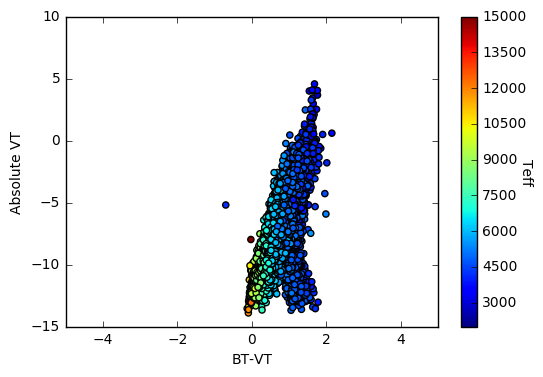

In [279]:
#plt.scatter(df.BTmag-df.VTmag,df.Jmag-df.Hmag,c=df.Teff)

plt.scatter(df.BTmag-df.VTmag,Vabs,c=df.Teff)
plt.xlabel('BT-VT')
plt.xlim(-5, 5)
plt.ylabel('Absolute VT')
plt.clim(2000,15000)
cbar = plt.colorbar()
cbar.set_label('Teff', rotation=270)

plt.show()


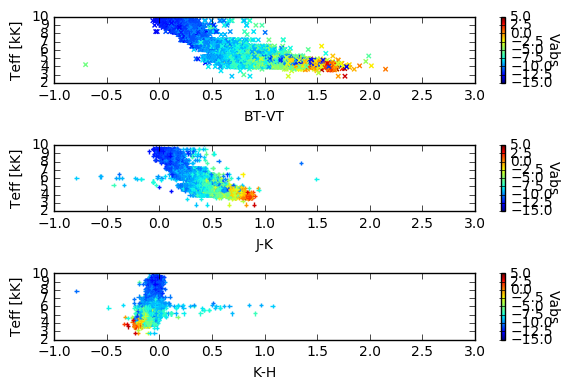

In [310]:
plt.subplot(3, 1, 1)
plt.scatter(df.BTmag-df.VTmag,df.Teff/1000,c=Vabs,marker="x", s=10.0)

plt.xlabel('BT-VT')
plt.xlim(-1, 3)
plt.ylim(2, 10)
plt.ylabel('Teff [kK]')
plt.clim(-15,5)
cbar = plt.colorbar()
cbar.set_label('Vabs', rotation=270)

plt.subplot(3, 1, 2)
plt.scatter(test.Jmag-test.Kmag,df.Teff/1000,c=Vabs, marker="+", s=10.0)
plt.xlabel('J-K')
plt.xlim(-1, 3)
plt.ylim(2, 10)
plt.ylabel('Teff [kK]')
plt.clim(-15,5)
cbar = plt.colorbar()
cbar.set_label('Vabs', rotation=270)

plt.subplot(3, 1, 3)
plt.scatter(test.Kmag-test.Hmag,df.Teff/1000,c=Vabs, marker="+", s=10.0)
plt.xlabel('K-H')
plt.xlim(-1, 3)
plt.ylim(2, 10)
plt.ylabel('Teff [kK]')
plt.clim(-15,5)
cbar = plt.colorbar()
cbar.set_label('Vabs', rotation=270)

plt.tight_layout()
plt.show()


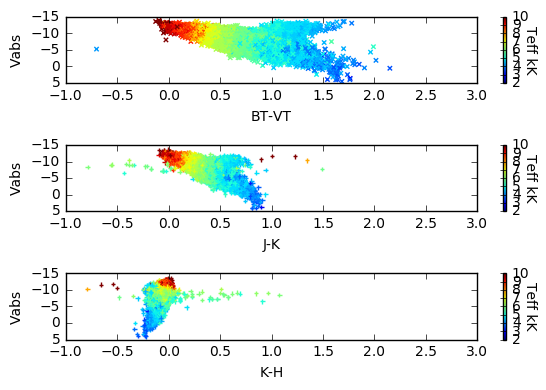

In [317]:
Mag_max =10
Mag_min = -20

plt.subplot(3, 1, 1)
plt.scatter(df.BTmag-df.VTmag,Vabs,c=df.Teff/1000,marker="x", s=10.0)

plt.xlabel('BT-VT')
plt.ylabel('Vabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(-15,5)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.subplot(3, 1, 2)
plt.scatter(test.Jmag-test.Kmag,Vabs,c=df.Teff/1000, marker="+", s=10.0)
plt.xlabel('J-K')
plt.ylabel('Vabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(-15,5)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.subplot(3, 1, 3)
plt.scatter(test.Kmag-test.Hmag,Vabs,c=df.Teff/1000, marker="+", s=10.0)
plt.xlabel('K-H')
plt.ylabel('Vabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(-15,5)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

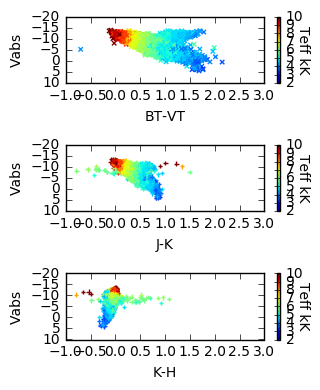

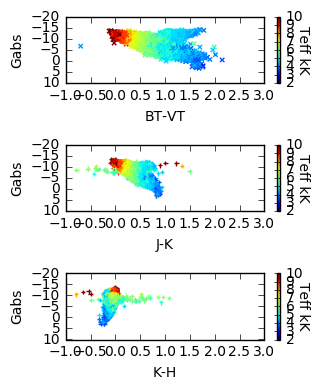

In [330]:
Mag_max =10
Mag_min = -20
plt.subplot(3, 2, 1)
plt.scatter(df.BTmag-df.VTmag,Vabs,c=df.Teff/1000,marker="x", s=10.0)

plt.xlabel('BT-VT')
plt.ylabel('Vabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(Mag_min,Mag_max)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.subplot(3, 2, 3)
plt.scatter(test.Jmag-test.Kmag,Vabs,c=df.Teff/1000, marker="+", s=10.0)
plt.xlabel('J-K')
plt.ylabel('Vabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(Mag_min,Mag_max)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.subplot(3, 2, 5)
plt.scatter(test.Kmag-test.Hmag,Vabs,c=df.Teff/1000, marker="+", s=10.0)
plt.xlabel('K-H')
plt.ylabel('Vabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(Mag_min,Mag_max)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



plt.subplot(3, 2, 2)
plt.scatter(df.BTmag-df.VTmag,Gabs,c=df.Teff/1000,marker="x", s=10.0)

plt.xlabel('BT-VT')
plt.ylabel('Gabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(Mag_min,Mag_max)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.subplot(3, 2, 4)
plt.scatter(test.Jmag-test.Kmag,Gabs,c=df.Teff/1000, marker="+", s=10.0)
plt.xlabel('J-K')
plt.ylabel('Gabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(Mag_min,Mag_max)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.subplot(3, 2, 6)
plt.scatter(test.Kmag-test.Hmag,Gabs,c=df.Teff/1000, marker="+", s=10.0)
plt.xlabel('K-H')
plt.ylabel('Gabs')
plt.xlim(-1, 3)
plt.clim(2, 10)
plt.ylim(Mag_min,Mag_max)
cbar = plt.colorbar()
cbar.set_label('Teff kK', rotation=270)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## Plot color-color 2MASS diagram (J-H vs H-K)

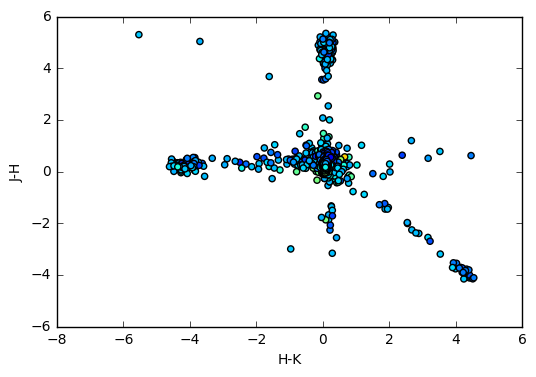

In [267]:
plt.scatter(df.Hmag-df.Kmag,df.Jmag-df.Hmag,c=np.log(df.Teff))
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.show()


#

### Get rid of the "weird" 2Mass stars (non AAA flag)

In [ ]:
test = pd.DataFrame.copy(df)
test.loc[(test['Qfl'] != "AAA"), ['Jmag'] ] = np.nan
test.loc[(test['Qfl'] != "AAA"), ['Hmag'] ] = np.nan
test.loc[(test['Qfl'] != "AAA"), ['Kmag'] ] = np.nan
print(df.Kmag[100:120])
print(test.Kmag[100:120])

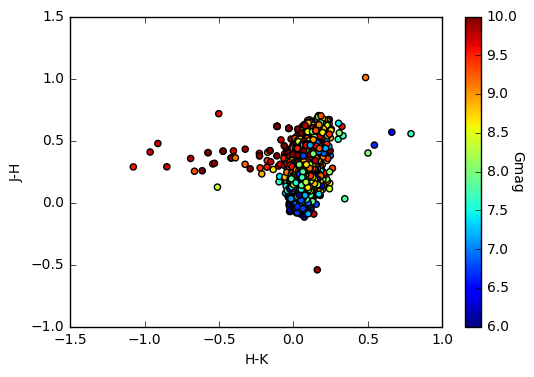

In [268]:
plt.scatter(test.Hmag-test.Kmag,test.Jmag-test.Hmag,c=test.__Gmag_,s=20.0)

plt.xlabel('H-K')
plt.ylabel('J-H')
plt.clim(6,10)
cbar = plt.colorbar()
cbar.set_label('Gmag', rotation=270)
plt.show()




In [ ]:
df['newcol'] = df['col1'].astype(str) + df['col2'].astype(str)

In [350]:

test['G_Leff'] = pd.Series(5857.6, index=test.index)
test['VT_Leff'] = pd.Series(5350.0, index=test.index)
test['BT_Leff'] = pd.Series(4220.0, index=test.index)
test['J_Leff'] = pd.Series(12350, index=test.index)
test['H_Leff'] = pd.Series(16620, index=test.index)
test['K_Leff'] = pd.Series(21590, index=test.index)
#test.G_Leff


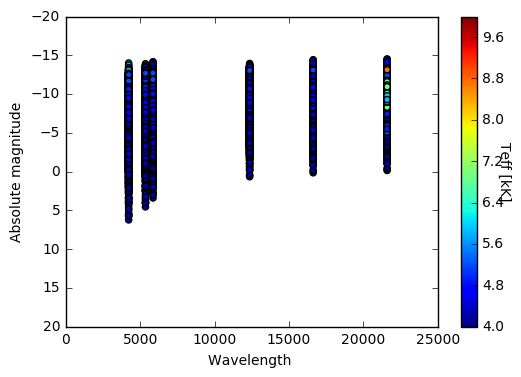

In [354]:
sizem = 20
plt.scatter(test.G_Leff,Gabs,c=test.Teff/1000,s=sizem)
plt.scatter(test.VT_Leff,Vabs,c=test.Teff/1000,s=sizem)
plt.scatter(test.BT_Leff,Babs,c=test.Teff/1000,s=sizem)
plt.scatter(test.J_Leff,Jabs,c=test.Teff/1000,s=sizem)
plt.scatter(test.H_Leff,Habs,c=test.Teff/1000,s=sizem)
plt.scatter(test.K_Leff,Kabs,c=test.Teff/1000,s=sizem)


plt.xlabel('Wavelength ')
plt.ylabel('Absolute magnitude')
plt.clim(4,10)
plt.ylim(20,-20)
cbar = plt.colorbar()
cbar.set_label('Teff [kK]', rotation=270)
plt.show()
